In [51]:
from glob import glob

for g in glob('../data/*.pdf'):
    print(g)

../data\2040_seoul_plan.pdf
../data\OneNYC_2050_Strategic_Plan.pdf


In [52]:
#pdf 파일 읽고 청크 단위로 텍스트를 잘라 리스트로 담아 반환
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

def read_pdf_and_split_text(pdf_path, chunk_size=1000, chunk_overlap=100):
    """
        주어진 PDF 파일을 읽고 텍스트를 분할합니다.
        매개변수 :
            pdf_path(str) :PDF 파일의 경로
            chunk_size(int,선택적) : 각 텍스트 정크의 크기, 기본값은 1000입니다.
            chunk_overlap(int, 선택적): 정크 간의 중첩 크기, 기본 값은 100입니다.

        반환값 :
            list : 분할된 텍스트 청크의 리스트
    """

    print(f"PDF : {pdf_path} -------------------------")

    pdf_loader = PyPDFLoader(pdf_path)
    data_from_pdf = pdf_loader.load()

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size = chunk_size, chunk_overlap = chunk_overlap
    )

    splits = text_splitter.split_documents(data_from_pdf)

    print(f"Nuver of split : {len(splits)}\n")

    return splits

In [53]:
#vectorstore 설정하고 청크 처리하기 (100개씩 나눠서 처리)
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
import os
from dotenv import load_dotenv

load_dotenv()

#vectorstore 설정
embedding = OpenAIEmbeddings(model='text-embedding-3-large')

persist_directory='../chroma_store/'

if os.path.exists(persist_directory):
    print("Loading existing Chroma store")
    vectorstore = Chroma(
        persist_directory=persist_directory,
        embedding_function=embedding
    )
else:
    print("Creating new Chroma store")

    vectorstore = None
    for g in glob ('../data/*.pdf'):
        chunk = read_pdf_and_split_text(g)
        #100개씩 나눠서 저장
        for i in range(0,len(chunks),100):
            if vectorstore is None:
                vectorstore = Chroma.from_documents(
                    documents=chunks[i:i+100],
                    embedding=embedding,
                    persist_directory=persist_directory
                )
            else:
                vectorstore.add_documents(
                    documents=chunks[i:i+100]
                )



Loading existing Chroma store


In [74]:
#관련 문서 검색

retriever = vectorstore.as_retriever(search_kwargs={"k":5})

chunks = retriever.invoke("서울 온실가스 저감 계획")

for chunk in chunks :
    print(chunk.metadata)
    print(chunk.page_content)

{'source': '../data/2040_seoul_plan.pdf', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'producer': 'Hancom PDF 1.3.0.542', 'author': 'SI', 'page_label': '64', 'pdfversion': '1.4', 'page': 63, 'creationdate': '2024-12-12T18:16:11+09:00', 'total_pages': 205}
56제2장 미래상과 목표
6. 미래위기를 준비하는, ‘탄소중립 안전도시 구축’1) 배경전(全) 지구적인 기후변화에 대응하기 위한 대도시 차원의 대응 필요Ÿ서울시 2017년 온실가스 배출량은 46,685천 톤CO2eq로 2005년 배출량에 비해 5.6%(276만 톤CO2eq) 감소하였으며, 서울의 1인당 온실가스 배출량은 4.7CO2eq로 국가의 13.8톤CO2eq에 비해 낮은 수준이다. 또한 2014년 기준 서울의 1인당 온실가스 배출량은 4.5CO2eq로 세계 주요 도시에 비해 낮은 수준을 보인다.7)
[그림 2-26] 세계 주요 도시 1인당 온실가스 배출량   자료: World Bank, 2014Ÿ그럼에도 불구하고, 기후변화 문제는 21세기에 전 지구적으로 가장 위중한 영향을 미칠 것으로 예상되는바, 탄소중립과 기후위기 대응은 국제·국가·도시의 핵심 정책으로 다루어져야 한다.Ÿ파리협정(2015) 이후, 우리나라를 비롯한 미국, 유럽연합 등 세계 136개국이 탄소중립을 선언하였으며, 서울시를 비롯한 뉴욕, 런던 등과 같은 많은 글로벌 도시에서 탄소중립을 시정의 핵심과제로 추진 중이다.Ÿ우리나라는 2020년 ‘한국판 그린뉴딜’을 발표하며 공식적으로 2050 탄소중립을 선언하였으며 서울시 역시 2020년 ‘그린뉴딜 추진을 통한 2050 온실가스 감축 전략’을 발표하고 탄소중립 선언에 따른 부문별 사업을 적극 추진하고 있다.-서울시는 2050년 탄소중립을 목표

In [55]:
#챗봇으로 활용하기 위한 언어모델 설정
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")
model.invoke("안녕")

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-D2VyI1jvJYkCcL6ZLXbFHjhgnij0D', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bfdf0-0dfc-7ea0-a60f-b772b6210062-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [56]:
#사용자 질문에 따라 RAG 사용 여부를 판단하는 기능인 라우터 사용

from langchain_core.prompts import ChatPromptTemplate
from typing import Literal
from pydantic import BaseModel, Field

class RouteQuery(BaseModel):
    """사용자 쿼리를 가장 관련성이 높은 데이터 소스로 라우팅한다."""

    datasource : Literal["vectorstore", "casual_talk"] = Field(
        ...,
        description="""
            사용자 질문에 따라 causal_talk 또는 vectorstore로 라우팅합니다.
            -casual_talk : 일상 대화를 위한 데이터 소스. 사용자가 일상적인 질문을 할 때 사용
            -vectorstore: 사용자 질문에 답하기 위해 RAG로 vectorstore 검색이 필요한 경우 사용합니다.
        """
    )

In [57]:
#router_system 으로 시스템 프롬프틀르 작성해 사용자 질문을 판단하게 함
#사용자 질문 받고 판단하기

#특정 모델을 structured output(구조화된 출력)과 함께 사용하기 위해 설정
structured_llm_output = model.with_structured_output(RouteQuery)

router_system = """
    당신은 사용자의 질문을 vectorstore 또는 casual_talk 으로 라우팅하는 전문가입니다.
    -vectorstore에는 서울, 뉴욕의 발전 계획과 관련된 문서가 포함되어 있습니다. 이 주제에 대한 질문에는 vectorstore를 사용하십시오.
    -사용자의 질문이 일상 대화에 관련된 경우 casual_talk를 사용하십시오
"""

#시스템 메시지와 사용자의 질문을 포함하는 프롬프트템플릿 생성
route_prompt = ChatPromptTemplate.from_messages([
    ("system",router_system),
    ("human","{question}")
])

#라우터 프롬프트와 구조화된 출력 모델을 결합한 객체
question_router = route_prompt | structured_llm_output


In [58]:
print(
    question_router.invoke({
        "question" : "서울 온실가스 저감 계획은 무엇인가요?"
    })
)

print(question_router.invoke({"question":"잘 지냈어?"}))

datasource='vectorstore'
datasource='casual_talk'


In [59]:
#문서의 관련성을 판단하는 방법을 프롬프트로 작성하고 BaseModel,.with_structured_output을 활용해 출력 형식 제한

#GradeDocuments 클래스 생성(BaseModel을 사용해 출력 방식을 yes or no로만 제한)

class GradeDocuments(BaseModel):
    """검색된 문서가 질문과 관련성 있는지 yes 또는 no로 평가합니다."""

    binary_score : Literal["yes","no"] = Field(
        descriotion="문서가 질문과 관련이 있는지 여부를 'yes' 또는 'no'로 평가합니다."
    )

structured_llm_grade = model.with_structured_output(GradeDocuments)

C:\Users\USER\AppData\Local\Temp\ipykernel_14136\3075079858.py:8: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'descriotion'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  binary_score : Literal["yes","no"] = Field(


In [75]:
#프롬프트 작성하고 테스트하기
from langchain_core.prompts import PromptTemplate
#기존 대화내용이 이어질 필요가 없는 경우는 PromptTemplate이 더 적합
grader_prompt = PromptTemplate.from_template("""
    당신은 검색된 문서가 사용자 질문과 관련이 있는지 평가하는 평가자입니다. \n
    문서에 사용자 질문과 관련된 키워드 또는 의미가 포함되어 있으면, 해당 문서를 관련성이 있다고 평가하십시오.\n
    엄격한 테스트가 필요하지 않습니다. 목표는 잘못된 검색 결과를 걸러내는 것입니다. \n
    문서가 질문과 관련이 있는지 여부를 나타내기 위해 'yes' 또는 'no'로 이진 점수를 부여하십시오.
                                             
    Retrieved document : \n {document} \n\n
    User question : {question}
""")

retrievalgrader = grader_prompt | structured_llm_grade
question = "서울시 자율주행 관련 계획"
documents = retriever.invoke(question)

for doc in documents:
    print(doc)

page_content='36제2장 미래상과 목표
6) 미래교통수단의 등장과 첨단 인프라 요구 증대자율주행, UAM 등 미래 교통에 공간적 대응방안 마련 필요Ÿ자율주행차량, 전동킥보드 등 교통 기술의 발전에 따라 새로운 교통환경이 조성되고 있음에도 불구하고, 이에 대한 정착 가이드라인이 없어, 위험한 교통 사고가 유발되고 있다.-최근 3년간 서울시에서 발생한 전동킥보드 관련 사고 대다수는 전동 킥보드와 차량 간 충돌 사고Ÿ안전하고 효율적인 기존-신규 교통수단의 조화를 도모하고, 이와 함께 발생할 도시공간구조 변화에 대비하기 위해 통합적인 교통수단 정착 가이드라인이 필요하다.7) 시가지 공간의 포화, 개발가용지의 부족새로운 도시공간에 대한 수요 대응과 성장동력 확보 한계Ÿ서울의 녹지지역을 제외한 대부분의 개발가용지는 고갈된 상태이며, 남은 공간은 주택공급을 위주로 개발하고 있다.-서울시에서 개발제한구역 25%를 제외하면 65%에 해당하는 시가화면적 366㎢ 중 미개발지는 거의 없는 상태Ÿ외연적 팽창이 아닌, 선택과 집중을 통한 콤팩트 시티로의 공간구조 재편을 지향하고 복합 개발을 통해 약해진 도시경쟁력 강화가 필요한 시점이다.8) 늙어가는 서울, 도시 정비의 정체에 따른 환경 악화정비사업 추진동력 저하, 쾌적한 도시환경에 대한 요구 증대Ÿ2038년 서울시 기반시설 노후화 비율은 2018년 대비 2.7배 급증, 1960~70년대 집중 조성된 기반시설의 노후화에 따른 시설 안전성 확보가 필요하다.-2040년, 서울 전체 주택 중 노후 물량 50%로 추정Ÿ때문에, 쾌적한 도시환경 구축을 위해서는 노후 기반시설로 인한 안전성 검토와 개선비용 증가에 따른 선제적인 대응이 필요하다.
[그림 2-19] 서울시 전동킥보드 사고 추이자료: 서울시 소방재난본부
제1절 서울의 변화진단379) 경직된 서울, 도시계획 규제 완화에 대한 요구 증대지역특성과 미래변화를 고려한 유연한 도시계획 요구Ÿ과도한 도시계획 규제로 인해, 미래 융복합 시대에' metadata={'total_pages

In [61]:
#관련된 청크만 리스트에 추가
filtered_docs = []

for i, doc in enumerate(documents):
    print(f"Document {i +1} :")
    is_relevant = retrievalgrader.invoke({"question":question,"document" : doc.page_content})
    print(is_relevant)
    print(doc.page_content[:200])
    print("=========================\n\n")

    if is_relevant.binary_score == "yes":
        filtered_docs.append(doc)

print(f"Filtered documents: {len(filtered_docs)}")

Document 1 :
binary_score='yes'
36제2장 미래상과 목표
6) 미래교통수단의 등장과 첨단 인프라 요구 증대자율주행, UAM 등 미래 교통에 공간적 대응방안 마련 필요Ÿ자율주행차량, 전동킥보드 등 교통 기술의 발전에 따라 새로운 교통환경이 조성되고 있음에도 불구하고, 이에 대한 정착 가이드라인이 없어, 위험한 교통 사고가 유발되고 있다.-최근 3년간 서울시에서 발생한 전동킥보드 관련 사고 


Document 2 :
binary_score='yes'
54제2장 미래상과 목표
5. 기술발전에 선제적 대응, ‘미래교통 인프라 구축’1) 배경미래교통수단 도입에 따른 도시 활동 변화 및 공간구조 재편 대비Ÿ빠르게 진화하는 미래 신 교통수단은 도시공간에 새로운 변화를 일으킬 것이며, 도시 내 이동패턴의 변화를 가져올 것으로 예측된다. 이러한 점을 고려하여 도시 내 다양한 통행행태가 공존하는 포용적인 교통체계 구


Document 3 :
binary_score='yes'
제1절 서울의 변화진단353) 반복되는 팬데믹에 도시공간적 대응상수화되는 팬데믹, 회복탄력적 도시에 대한 관심 고조Ÿ2019년 발생한 코로나19에 의한 팬데믹은 서울시민의 일상생활을 마비시켰고 강제적인 거리두기 정책으로 경제위기가 심각해졌다.Ÿ전염병에 의한 팬데믹은 지속적으로 발생할 것으로 예측되고 있으며 이에 선제적인 예방 체계와 즉각적 대응을 위한 기반


Document 4 :
binary_score='yes'
90제3장 부문별 전략계획
5-1 미래교통수단과 융합을 위한 선제적 교통환경 구축5-1-1 신 교통수단·기술발전 등 미래 환경 변화에 대비한 인프라 구축·정비ŸUAM·전기차·자율주행차 등 미래교통수단의 상용


Document 5 :
binary_score='no'
146제5장 생활권계획
신규 역세권을 중심으로 새로운 중심지 육성Ÿ강북횡단선 등 도시철도망 구축계획에 따른 신규 역세권을 중심으로 지역 특성을 고려한 새로운 중심지를 육성하고, 도로·교통시설을 재구축하여 

In [62]:
#Rag 답변 생성

rag_generate_system ="""
너는 사용자의 질문에 대해 주어진 contecxt에 기반하여 답변하는 도시 계획 전문가야.
주어진 context는 vectorstore에서 검색된 결과야.
주어진 context를 기반으로 사용자의 question에 대해 답변 해.

===============================
question: {question}
context: {context}
"""

rag_prompt = PromptTemplate(
    input_variables=["question","context"],
    template = rag_generate_system
)

rag_chain = rag_prompt | model

question = "서울시 자율주행 관련 계획"

rag_chain.invoke({"question" : question, "context" : filtered_docs})

AIMessage(content='서울시의 자율주행 관련 계획에 따르면, 서울시는 미래 교통 수단의 도입과 개발을 위해 단계적으로 조치를 취하고 있습니다. 2030년까지는 간선도로 이상에서 자율주행 차량이 운영될 수 있는 도로 인프라를 조성하고, 2040년까지는 서울 전역에서 자율주행차량의 운행 환경을 구축할 계획입니다. 이 과정에서 자율주행 차량이 전체 교통 수송에서 차지하는 비율을 10%로 달성하는 것을 목표로 하고 있습니다.\n\n또한, 서울시는 도심 항공 교통(UAM) 기반 마련과 터미널 확충을 통해 새로운 교통 수단을 포함한 통합적인 교통체계 구축을 목표로 하고 있으며, 주요 수변 공간을 중심으로 광역노선을 확장할 계획입니다. 미래 지향적인 교통 허브를 조성하여 서울 내부 및 외부의 다양한 교통 수단을 연결하는 복합 기능의 공간도 제안하고 있습니다.\n\n결론적으로, 서울시는 자율주행과 관련된 다양한 기술적, 인프라적 준비를 통해 더욱 안전하고 효율적인 교통 환경을 조성하는 데 중점을 두고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 269, 'prompt_tokens': 2604, 'total_tokens': 2873, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-D2VyPX5j3V

In [63]:
#그래프 상태 선언하기
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
    question: str   #사용자 질문
    generation : str    #LLM 생성 결과
    documents : List[str]   #검색된 문서
    



In [64]:
#rag가 필요하면 vector_store를, 일반 대화 내용이면 causal_talk 반환
def route_question(state):
    """
        사용자 질문을 vectorstore 또는 casual_talk로 라우팅

        Args:
        state(dict) : 현재 graph state

        Return:
        state(dict) : 라우팅된 데이터 소스와 사용자 질문을 포함하는 새로운 graph state
    """

    print('---------ROUTE----------')
    question = state['question']
    route = question_router.invoke({"question" : question})

    print(f"--Routing to {route.datasource}")

    return route.datasource

In [79]:
#retreive노드 정의
#리트리버에서 state의 question으로 검색

def retreive(state):
    """
    vectorstore에서 질문에 대한 문서를 검색
    Args:
        state(dict) : 현재 graph state

    Return :
        state(dict) : 검색된 문서와 사용자 질문을 포함하는 새로운 graph state
    """

    print('---------RETRIEVE------------')
    question = state['question']

    documents = retriever.invoke(question)

    return {"documents": documents, "question": question}

    

In [101]:
#연관성이 있는 문서만 필터링하여 filtered_docs에 담고 state의 documents를 filter
def grade_documents(state):
    """
        겸색된 문서를 평가하여 질문과 관련성이 있는지 확인

        Args :
            state(dict): 현재 graph state

        Return : 
            state(dict) : 관련성이 있는 문서와 사용자 질문을 포함하는 새로운 graph state
    """

    print('------GRADE----------')
    question = state['question']
    documents = state['documents']
    filtered_docs = []

    for i, doc in enumerate(documents):
        is_relevant = retrievalgrader.invoke({"question" : question, "document": doc.page_content})
        if is_relevant.binary_score == "yes":
            filtered_docs.append(doc)
    return {"documents" : filtered_docs, "quesiton" : question}


In [102]:
#필터링한 state의documents를 이용해 최종답변을 생성
def generate(state):
    """
        LLM을 사용하여 문서와 사용자 질문에 대한 답변을 생성합니다.

        Args:
            state(dict) : 현재 graph state
        
        Return:
            state(dict) : LLM 생성 결과와 사용자 질문을 포함하는 새로운 graph state

    """
    print('---------GENERATE------------')
    question = state['question']
    documents = state['documents']
    generation = rag_chain.invoke({"question" : question, "context" : documents})

    return{
        "documents" : documents,
        "question" : question,
        "generation" : "generation"
    }

In [103]:
#casual_talk 생성
def casual_talk(state):
    """
        일상 대화를 위한 답변을 생성

        Args:
            state(dict) : 현재 graph state
        
        Return :
            state(dict) : 일상 대화 결과와 사용자 질문을 포함하는 새로운 graph state
    """

    print('-------------CASUAL TALK--------------')
    question = state['question']
    generation = model.invoke(question)
    return{
        "question" : question,
        "generation" : generation
    }

In [104]:
#랭그래프를 사용하기 위해 StateGraph를 만들고 노드들을 등록하고 각 노드들의 연결관계를 정의해야함
from langgraph.graph import START, StateGraph, END

workflow = StateGraph(GraphState)

workflow.add_node("retrieve",retreive)
workflow.add_node("grade_documents",grade_documents)
workflow.add_node("generate",generate)
workflow.add_node("casual_talk",casual_talk)


In [105]:
#각 노드들을 add.edge()로 연결, 조건에 따라 경로를 선택하는 기능을 제공하는 add_conditional_edge

workflow.add_conditional_edges(
    START,
    route_question,
    {
        "vectorstore" : "retrieve",
        "casual_talk" : "casual_talk"
    }
)

workflow.add_edge("casual_talk", END)
workflow.add_edge("retrieve", "grade_documents")
workflow.add_edge("grade_documents", "generate")
workflow.add_edge("generate", END)

app = workflow.compile()

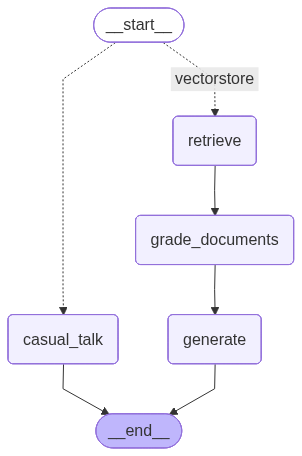

In [106]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [107]:
#멀티에이전트 테스트
inputs = {
    "question" :"서울시 자율주행 계획"
}

app.invoke(inputs)

---------ROUTE----------
--Routing to vectorstore
---------RETRIEVE------------
------GRADE----------
---------GENERATE------------


{'question': '서울시 자율주행 계획',
 'generation': 'generation',
 'documents': [Document(id='26351828-f8c1-486f-a24c-dc71f4fbe492', metadata={'pdfversion': '1.4', 'moddate': '2024-12-12T18:16:11+09:00', 'author': 'SI', 'page_label': '44', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'source': '../data/2040_seoul_plan.pdf', 'total_pages': 205, 'page': 43, 'producer': 'Hancom PDF 1.3.0.542'}, page_content='36제2장 미래상과 목표\n6) 미래교통수단의 등장과 첨단 인프라 요구 증대자율주행, UAM 등 미래 교통에 공간적 대응방안 마련 필요Ÿ자율주행차량, 전동킥보드 등 교통 기술의 발전에 따라 새로운 교통환경이 조성되고 있음에도 불구하고, 이에 대한 정착 가이드라인이 없어, 위험한 교통 사고가 유발되고 있다.-최근 3년간 서울시에서 발생한 전동킥보드 관련 사고 대다수는 전동 킥보드와 차량 간 충돌 사고Ÿ안전하고 효율적인 기존-신규 교통수단의 조화를 도모하고, 이와 함께 발생할 도시공간구조 변화에 대비하기 위해 통합적인 교통수단 정착 가이드라인이 필요하다.7) 시가지 공간의 포화, 개발가용지의 부족새로운 도시공간에 대한 수요 대응과 성장동력 확보 한계Ÿ서울의 녹지지역을 제외한 대부분의 개발가용지는 고갈된 상태이며, 남은 공간은 주택공급을 위주로 개발하고 있다.-서울시에서 개발제한구역 25%를 제외하면 65%에 해당하는 시가화면적 366㎢ 중 미개발지는 거의 없는 상태Ÿ외연적 팽창이 아닌, 선택과 집중을 통한 콤팩트 시티로의 공간구조 재편을 지향하고 복합 개발을 통해 약해진 도시경쟁력 강화가 필요한 시점

In [108]:
#멀티에이전트 테스트
inputs = {
    "question" :"잘 지내?"
}

app.invoke(inputs)

---------ROUTE----------
--Routing to casual_talk
-------------CASUAL TALK--------------


{'question': '잘 지내?',
 'generation': AIMessage(content='저는 잘 지내고 있어요! 당신은 어떻게 지내고 있나요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 11, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bbc38b4db', 'id': 'chatcmpl-D2WJ1OdSvNFe7oU2Deax89sMFyFkl', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bfe03-a535-7473-8dfb-87f191d7a903-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 18, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}

In [109]:
#멀티에이전트 테스트
inputs = {
    "question" :"서울시 자율 주행 차량 계획"
}

for msg, meta in app.stream(inputs, stream_mode="messages"):
    print(msg.content, end='')

---------ROUTE----------
{"datasource":"vectorstore--Routing to vectorstore
"}---------RETRIEVE------------
------GRADE----------
{"binary_score":"yes"}{"binary_score":"yes"}{"binary_score":"yes"}{"binary_score":"no"}{"binary_score":"yes"}---------GENERATE------------
서울시의 자율주행 차량 계획은 2040년 목표로 설정되어 있습니다. 계획의 주요 목표는 자율주행차량을 위한 운영 체계를 단계적으로 구축하여, 2030년까지 간선도로급 이상의 도로에서 자율주행차가 운영될 수 있는 인프라 환경을 조성하는 것입니다. 이후 2040년에는 서울 전역에서 자율주행차량의 운행 환경을 구축하고, 전체 교통 수송 분담률의 10%를 달성하는 것을 목표로 하고 있습니다.

이와 함께 서울시는 도심 항공교통(UAM) 기반을 마련하고, 주요 수변 공간을 중심으로 한 항공 노선 확장을 계획하고 있습니다. 또한, 서울 전역에 모빌리티 허브를 구축하여 기존 교통수단과의 원활한 연계를 도모하려고 합니다. 이를 통해 향후 변하는 도시의 이동 패턴과 다양한 통행 행태를 포용하는 교통체계로의 전환을 계획하고 있습니다. 도시계획적으로 이러한 새로운 교통수단을 위한 인프라를 사전에 준비하는 것이 필수적임을 강조하고 있습니다.